In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
import pcmdpy as ppy
import easydarkfigs
import pandas as pd
from drizzlepac import tweakreg
from tqdm import tqdm
from collections import defaultdict
%matplotlib inline

In [2]:
import os
from glob import glob

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
counts = defaultdict(int)
for infile in glob(os.path.join('../data/NGC4993/raw/', 'j*_flc.fits')):
    filt = fits.getval(infile, 'FILTER1')
    if 'CLEAR' in filt:
        filt = fits.getval(infile, 'FILTER2')
    targ = fits.getval(infile, 'TARGNAME')
    counts[filt] += 1
    newname = f'../data/NGC4993/raw/NGC4993_{filt:s}_EXP{counts[filt]:d}_flc.fits'
    if os.path.isfile(newname):
        raise FileExistsError(f'{newname} exists')
    os.rename(infile, newname)

In [5]:
files = {'F475W': ['../data/NGC4993/raw/NGC4993_F475W_EXP{:d}_flc.fits'.format(i) for i in range(1, 4)],
         'F850LP': ['../data/NGC4993/raw/NGC4993_F850LP_EXP{:d}_flc.fits'.format(i) for i in range(1, 3)]}
outputs = {'F475W': '../data/NGC4993/reduced/NGC4993_F475W_drc.fits',
          'F850LP': '../data/NGC4993/reduced/NGC4993_F850LP_drc.fits'}
diff_im = '../data/NGC4993/reduced/NGC4993_g-z.fits'
darks = {}

# Alignment and Drizzling

In [6]:
os.environ['jref'] = '/Users/bcook/pCMDs/pixcmd/data/NGC4993/calibration/'

In [9]:
%%time
ppy.data.alignment.drizzle_many(files, outputs, reference_filter='F850LP', verbose=True, updatewcs=False, realign_only=True,
                                realign_kwargs={'threshold': 100, 'nclip': 3, 'minobj': 10, 'refimagefindcfg': {'threshold': 100}})

*****************************************************
Realign and Redrizzle relative to F850LP
--F475W: Realigning
{'conv_width': 4.0, 'threshold': 100, 'shiftfile': False, 'updatehdr': True, 'writecat': False, 'clean': True, 'residplot': 'NoPlot', 'see2dplot': False, 'reusename': True, 'interactive': False, 'updatewcs': False, 'enforce_user_order': True, 'expand_refcat': True, 'wcsname': 'TWEAK_F850LP', 'refimage': '../data/NGC4993/reduced/NGC4993_F850LP_drc.fits', 'nclip': 3, 'refimagefindcfg': {'threshold': 100}, 'minobj': 10}
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 11:21:09.392 (12/04/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F475W_drc.fi

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]



Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits[1]
WCS Keywords

CD_11  CD_12: 8.211030854045054e-06 1.1793829785048013e-05
CD_21  CD_22: 1.1143268081043196e-05 -7.4904756772964694e-06
CRVAL    : 197.43369106737873 -23.372547321960308
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04982077533487912
ORIENTAT : 122.42037243093212
WCSNAME  :  TWEAK_F850LP_2

Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits[4]
WCS Keywords

CD_11  CD_12: 8.260049493704977e-06 1.145678793626229e-05
CD_21  CD_22: 1.0905395642485e-05 -7.1516019495422904e-06
CRVAL    : 197.46028256897495 -23.38797509205156
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049240461230418635
ORIENTAT : 121.9733995687958
WCSNAME  :  TWEA

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits['SCI',1]



Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits[1]
WCS Keywords

CD_11  CD_12: 8.211516344954147e-06 1.1793809738285985e-05
CD_21  CD_22: 1.1143214530084454e-05 -7.4909682745134085e-06
CRVAL    : 197.432062026902 -23.37176878053637
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04982165677777273
ORIENTAT : 122.4221217168106
WCSNAME  :  TWEAK_F850LP_2

Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits[4]
WCS Keywords

CD_11  CD_12: 8.260528696760276e-06 1.1456772174650772e-05
CD_21  CD_22: 1.0905336287053664e-05 -7.1520783943060625e-06
CRVAL    : 197.45865332952397 -23.387197568921213
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04924133234961511
ORIENTAT : 121.97514955434939
WCSNAME  :  TWEAK_F850LP_2

....Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits[1]
WCS Keywords

CD_11  CD_12: 8.211120319228406e-06 1.1793489728734269e-05
CD_21  CD_22: 1.1142924234015676e-05 -7.490589735705014e-06
CRVAL    : 197.43288383277272 -23.37215700696606
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049819970026447204
ORIENTAT : 122.42151494138594
WCSNAME  :  TWEAK_F850LP_2

Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits[4]
WCS Keywords

CD_11  CD_12: 8.260133495303306e-06 1.1456460071061609e-05
CD_21  CD_22: 1.0905054590504861e-05 -7.151714884235513e-06
CRVAL    : 197.45947449102863 -23.387585014448938
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04923966524992036
ORIENTAT : 121.97454253831157
WCSNAME  :  TWEAK_F850LP_2
--F475W: Redrizzling
    Drizzling Images with lanczos3 kernel to ../data/NGC49

Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 11:23:34.538 (12/04/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F475W_drc.fits
    /Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F850LP_drc.fits

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F475W_drc.fits':
  #  Source finding for '/Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F475W_drc.fits', EXT=('SCI', 1) started at: 11:23:34.74 (12/04/2019)
     Found 1292 objects.
===  FINAL number of objects in image '/Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F475W_drc.fits': 1292

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/N

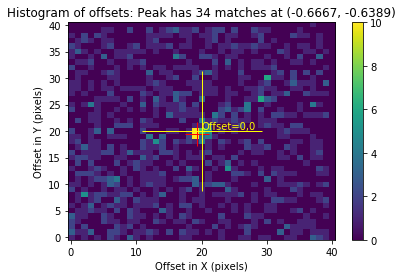

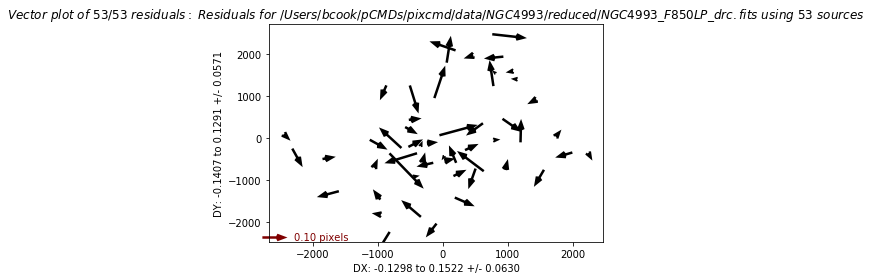

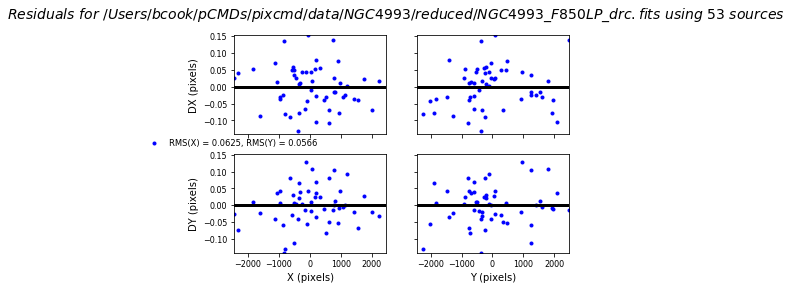

In [11]:
tweakreg.TweakReg([outputs['F475W'], outputs['F850LP']], conv_width=4.0, minobj=3,
                      threshold=50, nclip=3, shiftfile=False, writecat=False, clean=True,
                      interactive=False)

In [17]:
# # Create difference image to check alignment
# f1 = fits.open(outputs['F850LP'])
# f2 = fits.open(outputs['F475W'])
# data = f2['SCI'].data / f1['SCI'].data
# hdulist = fits.HDUList([fits.PrimaryHDU(), fits.ImageHDU(data=data)])
# hdulist.writeto(diff_im, overwrite=True)

# Automatic Source Extraction

In [85]:
with fits.open(outputs['F850LP'], mode='update') as h:
    print(h.info())

Filename: ../data/NGC4993/reduced/NGC4993_F850LP_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     787   ()      
  1  SCI           1 ImageHDU        80   (5935, 5921)   float32   
  2  MASKED        1 ImageHDU        80   (5935, 5921)   float32   
  3  MASKEDSUB     1 ImageHDU        14   (5935, 5921)   float64   
  4  WHT           1 ImageHDU        46   (5935, 5921)   float32   
  5  CTX           1 ImageHDU        39   (5935, 5921)   int32   
  6  BKGDSUB       1 ImageHDU        14   (5935, 5921)   float64   
  7  BKGDRMS       1 ImageHDU        14   (5935, 5921)   float64   
  8  BKGD          1 ImageHDU        14   (5935, 5921)   float64   
  9  FLAGS         1 ImageHDU        20   (5935, 5921)   int32   
 10  HDRTAB        1 BinTableHDU    631   4R x 311C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 3A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 

In [83]:
with fits.open(outputs['F475W'], mode='update') as h:
    print(h.info())

Filename: ../data/NGC4993/reduced/NGC4993_F475W_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     821   ()      
  1  SCI           1 ImageHDU        88   (5935, 5921)   float32   
  2  WHT           1 ImageHDU        46   (5935, 5921)   float32   
  3  CTX           1 ImageHDU        39   (5935, 5921)   int32   
  4  HDRTAB        1 BinTableHDU    631   6R x 311C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 3A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, D, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 4A, L, D, D, D, 3A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 18A, 3A, K, 5A, 7A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 6A, D, 3A, 6A, K, D, D, D, D, D, D, D, D, D, D, 

In [35]:
%%time
box = 8
ppy.data.sources.estimate_background(outputs['F850LP'], bkg_kwargs={'bw':box, 'bh':box})

CPU times: user 4min, sys: 6.2 s, total: 4min 6s
Wall time: 4min 13s


In [81]:
%%time
ppy.data.sources.mask_sources_auto(outputs['F850LP'], threshold=10.0)

CPU times: user 5.73 s, sys: 9.46 s, total: 15.2 s
Wall time: 19.9 s


# Manual Source Extraction

In [84]:
ppy.data.sources.mask_sources_manual(outputs['F850LP'], '../data/NGC4993/masks/NGC4993_F850LP.reg')

In [38]:
# compute regions using only source masks
ppy.data.sources._add_masked(outputs['F850LP'], mask_flags=[ppy.data.utils.ALL_FLAGS['SEXTRACTOR'],
                                                            ppy.data.utils.ALL_FLAGS['MANUAL']])

# Combine Masks

In [89]:
ppy.data.utils.combine_flags(outputs)

# Compute Regions

In [90]:
ppy.data.extraction.add_regions(outputs, '../data/NGC4993/masks/NGC4993_F850LP_contours_new.reg', base_filter='F850LP',
                                xc=2827, yc=2659)

100%|██████████| 79/79 [05:01<00:00,  3.81s/it]


array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

# Extract PCMDs

In [91]:
pcmds = ppy.data.extraction.save_pcmds(outputs, 'F850LP', 'F475W', path='../data/NGC4993/pcmds/',
                                       name_append='NGC4993_z_gz')

Filter: F850LP
Observation Date: 57992 (MJD)
Vega ZeroPoint: 24.3316
AB ZeroPoint: 24.8573
ST ZeroPoint: 25.9444
Exposure Time: 680.0
A pre-made filter is available
Filter: F475W
Observation Date: 57992 (MJD)
Vega ZeroPoint: 26.1477
AB ZeroPoint: 26.0552
ST ZeroPoint: 25.7448
Exposure Time: 1395.0
A pre-made filter is available


/Users/bcook/pCMDs/pixcmd/pcmdpy/pcmdpy/simulation/gpu_utils.py:267: RuntimeWarning: invalid value encountered in log10
  return np.log10(array_in)
100%|██████████| 316/316 [00:31<00:00,  9.96it/s]


# Check

In [93]:
f = ppy.instrument.default_ngc4993_filters(exp_ratio=1.0)

In [94]:
with fits.open(outputs['F850LP']) as h:
    mags = f[0].counts_to_mag(h['SCI'].data)
    regions = h['REGIONS'].data
with fits.open(outputs['F475W']) as h:
    colors = f[1].counts_to_mag(h['SCI'].data) - mags

/Users/bcook/pCMDs/pixcmd/pcmdpy/pcmdpy/simulation/gpu_utils.py:267: RuntimeWarning: invalid value encountered in log10
  return np.log10(array_in)


In [95]:
regions[np.isnan(mags)] = -1

In [96]:
ellips = {}
xc, yc = 2827, 2659
delta_mags = []
for i in tqdm(range(regions.max() // 4), desc='NGC4993'):
    mask = (regions >= 4*i + 1)&(regions < 4*(i+1) + 1)
    ellips[i+1] = ppy.data.extraction.EllipticalFit(mask, xc=xc, yc=yc)
    delta_mags.append(ellips[i+1].delta_val(mags))

NGC4993: 100%|██████████| 79/79 [05:56<00:00,  4.51s/it]


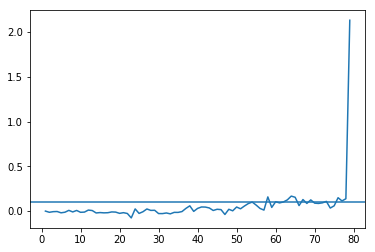

In [97]:
plt.plot(np.arange(len(delta_mags))+1, delta_mags)
plt.axhline(y=0.1)

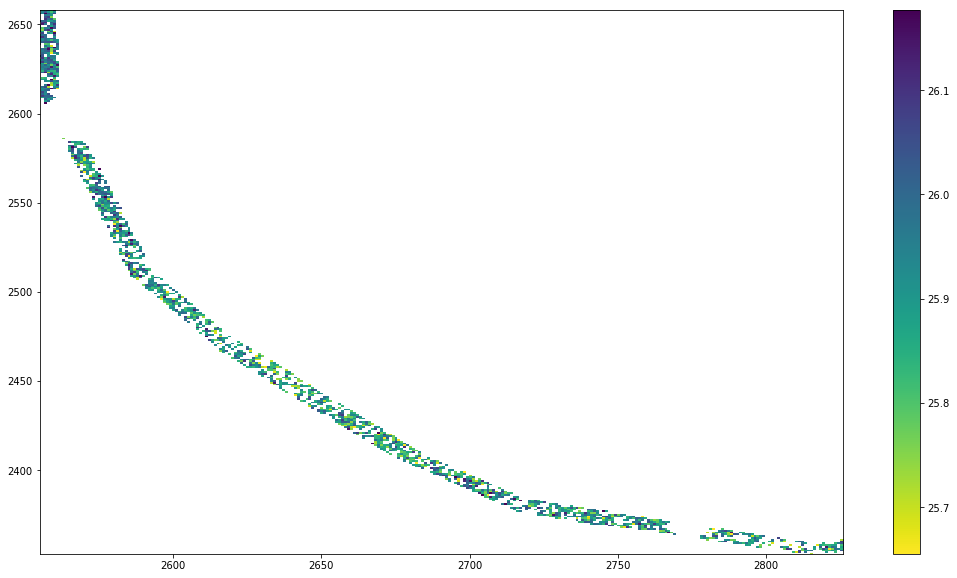

In [115]:
fig, ax = plt.subplots(figsize=(18,10))
ppy.data.extraction.plot_image(mags, (regions==203), ax=ax)

/Users/bcook/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(25.6, 26.1)

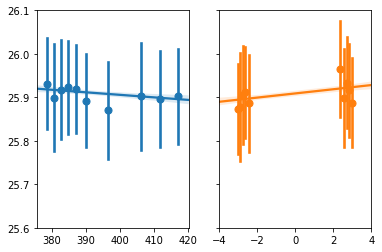

In [114]:
fig, axes = plt.subplots(ncols=2, sharey=True)
ellips[50].plot_radial_gradient(mags, mask=(regions==203), ax=axes[0])
ellips[50].plot_angular_gradient(mags, mask=(regions==203), ax=axes[1])
axes[1].set_xlim([-4 ,4])
axes[1].set_ylim([25.6, 26.1])

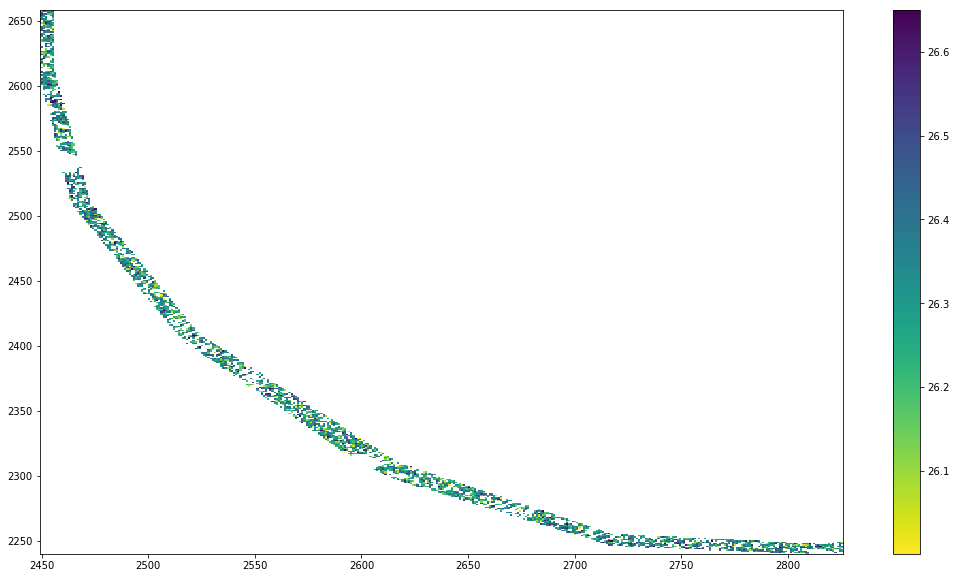

In [116]:
fig, ax = plt.subplots(figsize=(18,10))
ppy.data.extraction.plot_image(mags, (regions==143), ax=ax)

/Users/bcook/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(26.5, 26.0)

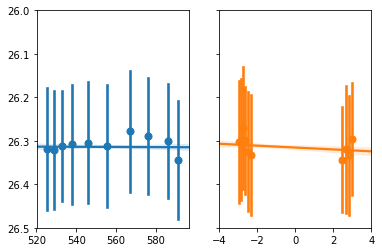

In [118]:
fig, axes = plt.subplots(ncols=2, sharey=True)
ellips[35].plot_radial_gradient(mags, mask=(regions==143), ax=axes[0])
ellips[35].plot_angular_gradient(mags, mask=(regions==143), ax=axes[1])
axes[1].set_xlim([-4 ,4])
axes[1].set_ylim([26.5, 26.0])

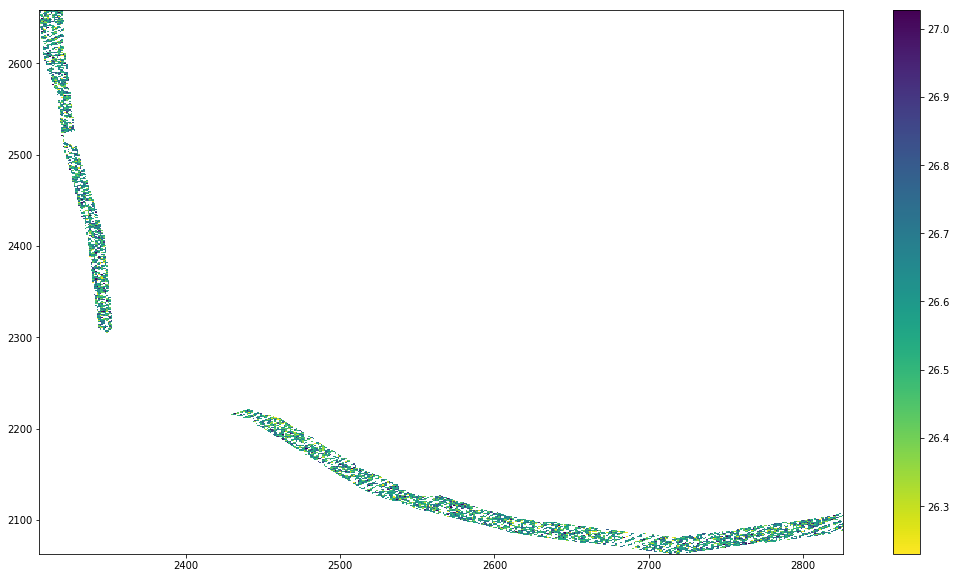

In [119]:
fig, ax = plt.subplots(figsize=(18,10))
ppy.data.extraction.plot_image(mags, (regions==83), ax=ax)

/Users/bcook/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(26.8, 26.4)

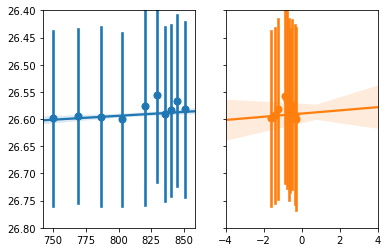

In [126]:
fig, axes = plt.subplots(ncols=2, sharey=True)
ellips[20].plot_radial_gradient(mags, mask=(regions==83), ax=axes[0])
ellips[20].plot_angular_gradient(mags, mask=(regions==83), ax=axes[1])
axes[1].set_xlim([-4 ,4])
axes[1].set_ylim([26.8, 26.4])

In [14]:
pcmds_old = {}
for i in tqdm(range(1, 180)):
    filename = f'../data/NGC4993/pcmds/NGC4993_z_gz_{i}.pcmd'
    try:
        pcmds_old[i] = np.loadtxt(filename, unpack=True)
    except OSError:
        continue
    if len(pcmds_old[i]) == 0:
        pcmds_old.pop(i)
        os.remove(filename)

100%|██████████| 179/179 [00:10<00:00, 17.30it/s]


In [98]:
keys = np.array(list(pcmds.keys()))

In [99]:
keys

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 158,
       159, 160, 162, 163, 164, 166, 167, 168, 170, 171, 172, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 18

In [100]:
Neffs = {i: np.sqrt(pcmds[i].shape[1]) for i in pcmds.keys()}

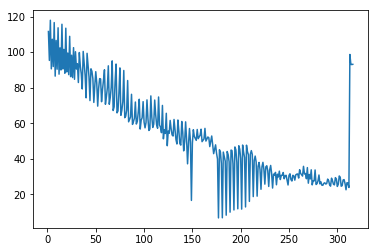

In [101]:
plt.plot(Neffs.keys(), Neffs.values())

In [102]:
f = ppy.instrument.default_ngc4993_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)

In [103]:
dmod = 33.0

In [104]:
ppy.distancemodels.dmod_to_mpc(dmod)

39.810717055349734

In [105]:
driv = ppy.driver.Driver(iso_model, gpu=False)

In [107]:
gal_3 = ppy.galaxy.SSPSimple(np.array([0., -2., 3., 10.]), dmod=dmod)
gal_4 = ppy.galaxy.SSPSimple(np.array([0., -2., 4., 10.]), dmod=dmod)
gal_5 = ppy.galaxy.SSPSimple(np.array([0., -2., 5., 10.]), dmod=dmod)
gal_6 = ppy.galaxy.SSPSimple(np.array([0., -2., 6., 10.]), dmod=dmod)

In [108]:
sky = [60., 172.1]

In [109]:
# pcmd_3, _ = driv.simulate(gal_3, 256, sky_noise=sky, dither=False)
pcmd_4, _ = driv.simulate(gal_4, 256, sky_noise=sky, dither=False)
pcmd_5, _ = driv.simulate(gal_5, 256, sky_noise=sky, dither=False)
pcmd_6, _ = driv.simulate(gal_6, 256, sky_noise=sky, dither=False)

In [111]:
is_dark = False
for i in tqdm(np.unique((keys-1)//4)):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharex=True, sharey=True)
    axes = [axes[0,1], axes[0,0], axes[1,0], axes[1,1]] # 4 quadrants
    for j in range(4):
        k = j + 1 + 4*i
        if k not in pcmds:
            continue
        pcmd = pcmds[k]
        ppy.plotting.plot_pcmd(pcmd, ax=axes[j])
#         ppy.plotting.plot_pcmd_contours(pcmd_3, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_4, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_5, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_6, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        axes[j].set_title('Region {:d}, Neff = {:.0f}'.format(k, np.sqrt(pcmd.shape[1])))
        ppy.plotting.plot_isochrone(iso_model, dmod=30.25, axes=axes[j], mag_system='vega')
        axes[j].axhline(y=f[0].counts_to_mag(sky[0]), color='r', ls='--')
    axes[0].set_xlim([0, 3])
    axes[0].set_ylim([29, 22])
    plt.tight_layout()
    plt.savefig(f'figures/NGC4993/NGC4993_s{i}_pcmds.pdf')
    plt.close()

100%|██████████| 79/79 [01:45<00:00,  1.34s/it]
